# Introduction to Data Cleaning

## Introduction

The aim of this session is to introduce some of the basic data cleaning concepts and identify which are the sources of problems from gathering to transformations.

It is often said that 80% of data analysis is spent on the process of cleaning and preparing the data (Dasu T, Johnson T (2003). Exploratory Data Mining and Data Cleaning. Wiley-IEEE.), so it's worth devoting some time to understand the main issues we can find in this cleaning process.

The main problem Data Cleaning tries to solve is to transform Dirty Data into data that is ready for analysis or any other kind of meaningful management (i.e. model building, summarizing, visualization)

### What is Dirty Data?
There's probably no definition of dirty data nor clean data, so we will try to answer this question by identifying data sources and the problems they have when we try to process the data.

### What you will learn in this session
* Which are the main sources of data
* What we understand by Dirty Data and Clean Data
* How to approach the Data Analysis problem in 5 steps
* What kind of problems we may face during the process
* What kind of data can a data source contain

### Contents

* [Data Formats and Types](#Data-Formats-and-Types)
    * [Data Set (dataset)](#Data-Set-(dataset))
    * [Structured Data vs. Unstructured Data](#Structured-Data-vs.-Unstructured-Data)
    * [High-dimensional Data](#High-dimensional-data)
    * [Descriptive Data](#Descriptive-data)
    * [Longitudinal Data](#Longitudinal-data)
    * [File Types](#File-Types)
    * [Databases](#Databases)
* [Data Sources](#Data-Sources)
    * [Federated Data](#Federated-data)
    * [Streaming Data](#Streaming-data)
    * [Web (scrapped) Data](#Web-(scraped)-data)
    * [API Data](#API-data)
* [Data Quality](#Data-Quality)
    * [Data Quality Properties](#Data-Quality-Properties)
    * [Data Quality Problems (where can Dirty Data arise?)](#Data-Quality-Problems-(where-can-Dirty-Data-arise?))
* [Data Analysis in five steps](#Data-Analysis-in-Five-Steps)
* [Exercises](#Exercises)

## Data Formats and Types

### Data Set (dataset)

A data set (or dataset) is a collection of data. 

We can see datasets as 'tables' with and arbitrary number of rows ($n$) and columns ($p$). Each row is considered an observation and each column is considered a variable.


* **Variables:** For a computer programmer, a variable is a memory space that can be filled with a know (or unknown) quantity of information (a.k.a. value). Moreover, this space has an associated notation alias that can be used in a program in running time to modify the value of the variable. Well, don't take this as an exact definition, but it helps to provide us a general refresh of what a variable is (for us the CS).

    Well, statisticians have their own variables, lets have an (again) informal definition. In statistics, a variable is an attribute that describes a person, place, thing, or idea (often referred as feature). 

    As an example, we can take the list of physical characteristics of 10 persons. The objects of the matrix are the persons, the variables are the measured properties, such as the weight or the color of the eyes. 

    Variables can be classified as **qualitative** (*aka, categorical*) or **quantitative** (*aka, numeric*).

    * **Qualitative:** Qualitative variables take on values that are **names** or **labels**. The eye color (e.g., brown, green, gray, etc.) or the sex of the person (e.g., female, male) would be examples of qualitative or categorical variables.

    * **Quantitative:** Quantitative variables are numeric. They represent a measurable quantity. For example, when we speak of the age of a person, we are talking about the time past from its birth - a measurable attribute of the person. Therefore, age would be a qualitative variable.


* **From a DB point of view:** In the case of tabular data, a data set corresponds to one or more database tables, where every column of a table represents a particular variable, and each row corresponds to a given record of the data set in question. 

    The data set lists values for each of the variables, such as height and weight of an object, for each member of the data set. Each value is known as a **datum**. Data sets can also consist of a collection of documents or files. 

    Several characteristics define a data set's structure and properties. These include the number and types of the attributes or variables.


* **Special values**: all data in the same column (variable) belongs to the same type, however we can find missing values, meaning that this specific value is not present in the dataset

### Structured Data vs. Unstructured Data


* **Structured Data** (or structured information) is information that has a pre-defined data model or is organized in a pre-defined manner.

    We understand as  data model  an abstract model that organizes elements of data and standardizes how they relate to one another and to the properties of real-world entities. 

    For instance, structured data usually resides in relational databases (RDBMS) which organizes data in tables with fields.  


* **Unstructured Data** has no explicit model or schema (but the may have an internal model). It may be textual (for instance a book) or non-textual (for instance an image)


* **Semi-structured Data** (https://en.wikipedia.org/wiki/Semi-structured_data) is a form of structured data that does not obey the formal structure of data models associated with relational databases or other forms of data tables, but nonetheless contains tags or other markers to separate semantic elements and enforce hierarchies of records and fields within the data. 

|            _              |                                                                      **Structured Data**                                                                     |                                          **Unstructured Data**                                          |
|:------------------------:|:------------------------------------------------------------------------------------------------------------------------------------------------------------:|:-------------------------------------------------------------------------------------------------------:|
|    **Characteristics**   |  * Predefined data models * Usually text only * Easy to search                                                                                               |  * No predefined data model  * May be text, images, sound, video or other formats * Difficult to search |
|      **Resides in**      |  * Relational databases * Data Warehouses                                                                                                                    |  * Applications * NoSQL databases * Data warehouses * Data lakes                                        |
|     **Generated by**     |                                                                      Humans or machines                                                                      |                                            Humans or machines                                           |
| **Typical applications** |  * Airline reservation systems * Inventory control * CRM systems * ERP systems                                                                               |  * Word processing * Email clients * Media processing tools                                             |
|       **Examples**       |  * Dates * Phone numbers * Social Security numbers * Credit card numbers * Customer names * Addresses * Product names and numbers * Transactions information |  * Text files * Reports * Email messages * Audio files * Video files * Images * Surveillance imagery    |

### High dimensional data
Let’s say we have $n$ samples (a.k.a. data points, instances) and $p$ features (a.k.a. attributes, independent variables, explanatory variables). 

There's no precise definition of how many dimensions are "high dimensional" so the imprecise definition is that high dimensional data is simply a data set with a very large p (sometimes around 1000)

* **Images:** for example a 320x480 image means that we have 153600 variables which exceeds by a lot these $p$ limit. Note that 320x480 is for a single image ($n$ = 1)
* **Videos:** with videos we just add a new dimension to our data: time. Videos are a sequence of images indexed by time. We have multiple pictures by second, so even a short video with low resolution can contain millions of variables.
* **Categorical data:** Sometimes we want to handle categorical data as numerical data. One of the most straightforward ways of doing so is using the one-hot encoder, where for each possible value of the categorical variable, we create a new Boolean variable which represents the presence or absence for a certain value of a certain variable for each sample. This may lead to a high dimensional dataset. 
    For example if we have 20 categorical variables with each 50 possible values, by using a one-hot encoding approach we will have to create a new dataset with 1000 numerical variables.
* **Natural Language:** we can also have high-dimensional data in Natural Language when we deal with document representation. If we take a Bag of Words approach, where we represent each document/sentence as set of the frequency of its words we have to assign a value to each word for each document.

##### Data Sparsity and Data Density

We may have scenarios with high dimensional spaces that are dense (i.e. images, videos), this means that all variables have meaningful information.

For example, if we load a picture, we'll see that all variables have values representing the colors in a certain area of the picture:

In [30]:
%matplotlib inline

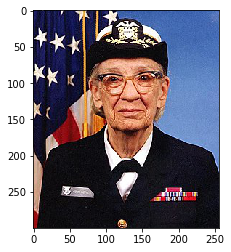

In [31]:
import requests
from PIL import Image
import io
import numpy as np
import matplotlib.pyplot as plt

url = "https://upload.wikimedia.org/wikipedia/commons/thumb/5/55/Grace_Hopper.jpg/256px-Grace_Hopper.jpg"
r = requests.get(url)

if r.status_code == 200:
    img_content = r.content
    img = Image.open(io.BytesIO(img_content))
    plt.imshow(img)
    plt.show()

In [32]:
np.array(img).shape

(300, 256, 3)

We can reshape this image to a single row

In [33]:
np.array(img).reshape(-1).shape

(230400,)

And check how many values are zero

In [34]:
(np.array(img).reshape(-1) == 0).sum()

3747

In [35]:
"This is a {}% of the variables".format(
    ((np.array(img).reshape(-1) == 0).sum()/np.array(img).reshape(-1).shape[0])*100
)

'This is a 1.6263020833333333% of the variables'

Now, as a comparative, let's encode 3 sentences using a Bag of Words approach

In [7]:
sentence1 = "Grace Brewster Murray Hopper (née Murray December 9, 1906 – January 1, 1992) " + \
             "was an American computer scientist and United States Navy rear admiral."
sentence2 = "One of the first programmers of the Harvard Mark I computer, she was a pioneer" + \
             "of computer programming who invented one of the first linkers."
sentence3 = "She popularized the idea of machine-independent programming languages, which led" + \
             "to the development of COBOL, an early high-level programming language still in use today. "

In [36]:
import re

def text_cleaner(text):
    rules = [
        {r"([^\w\s])(\w|\d)": r"\1 \2"},  # spaces symbols
        {r"(\w|\d)([^\w\s])": r"\1 \2"},  # spaces symbols
        {r"\s+": u" "},  # multiple spaces to one
    ]
    for rule in rules:
        for (k, v) in rule.items():
            regex = re.compile(k)
            text = regex.sub(v, text)
    text = text.rstrip()
    return text.lower()

word_set = set()
for s in [sentence1, sentence2, sentence3]:
    clean_sentence = text_cleaner(s)
    word_set.update(clean_sentence.split(" "))
    
print("We have {} different words".format(len(word_set)))

We have 60 different words


In [37]:
sentences_as_bow = []
for s in [sentence1, sentence2, sentence3]:
    clean_sentence = text_cleaner(s)
    bow = {w:0 for w in word_set}
    for word in clean_sentence.split(" "):
        if word in bow.keys():
            bow[word] += 1
    
    sentences_as_bow.append(bow)

In [38]:
n_zeros = 0
for sentence in sentences_as_bow:
    for value in sentence.values():
        if value == 0:
            n_zeros += 1
print("Number of zeros: {}".format(n_zeros))
print("This is a {}% of the variables".format(n_zeros/(len(word_set)*len(sentences_as_bow))*100))

Number of zeros: 109
This is a 60.55555555555555% of the variables


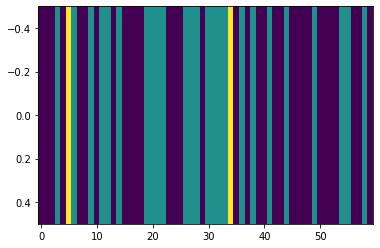

In [39]:
plt.imshow(np.array([v for v in sentences_as_bow[0].values()]).reshape(1,-1), aspect='auto')

##### Course of dimensionality (from [KDnuggets post](https://www.kdnuggets.com/2017/04/must-know-curse-dimensionality.html))

*"As the number of features or dimensions grows, the amount of data we need to generalize accurately grows exponentially."*

- Charles Isbell, Professor and Senior Associate Dean, School of Interactive Computing, Georgia Tech

So imagine we have 3 observations of an individuum (*i.e.* age of a cow) that is ranged from 0 to 10

In [12]:
x = [3, 2, 7]

This is a fairly small dataset, however our dimension space is 10 as we may want to represent any obsevation.

In [13]:
import sys

# size in bytes
x_space = np.linspace(0,10)
print("%d bytes" % (x_space.nbytes))
print("space dimension: {}".format(max(x_space)))

400 bytes
space dimension: 10.0


Now we want to add a new feature (*i.e.* colour). This variable has a range of 10 colours

In [14]:
y = [0, 1, 2]
y_space = np.linspace(0,10)

# size in bytes
print("%d bytes" % (np.array([x_space, y_space]).nbytes))
print("space dimension: {}".format(max(x_space) * max(y_space)))

800 bytes
space dimension: 100.0


Once again, we add a new variable. Say number of diseases during first year, and we again range this variable to 10 values.

In [15]:
z = [0, 6, 9]
z_space = np.linspace(0,10)

# size in bytes
print("%d bytes" % (np.array([x_space, y_space, z_space]).nbytes))
print("space dimension: {}".format(max(x_space) * max(y_space) * max(z_space)))

1200 bytes
space dimension: 1000.0


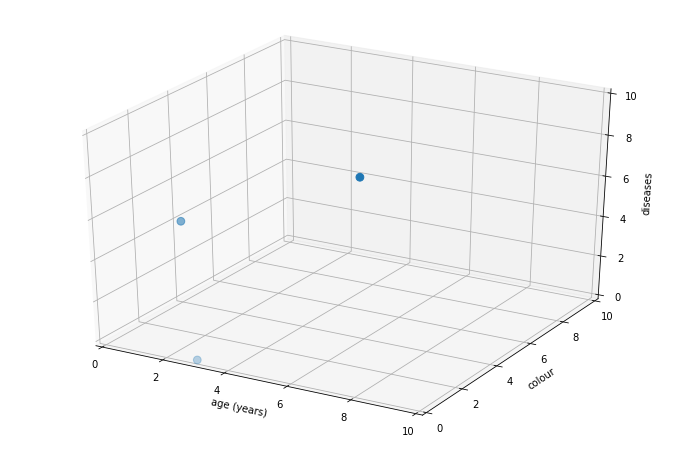

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x,y,z, s=60)
ax.set_xlim([0, 10])
ax.set_xlabel('age (years)')

ax.set_ylim([0, 10])
ax.set_ylabel('colour')

ax.set_zlim([0, 10])
ax.set_zlabel('diseases')


plt.show()

##### Bigger than memory problem

This problem arises when our dataset is bigger than our RAM memory, making the dataset untractable atomically.

It is a common problem when dealing with high-dimensional data (*i.e.* images, videos).

Take into account that we may have a large Hard Disk, where our data set can be allocated without any problem, but as if we want to perform any operation to the whole dataset, we will have to load it into the RAM memory.

The most naïve way of doing such a task is splitting the dataset, and processing it in batches. So, the most reasonable way is to define a batch size, load the data as small batches and perform the operations to these batches before saving it again to the storage media.

Another alternative is using a BigData framework, such as Spark or Dask, where data is loaded in a lazy manner and distributed in a computing cluster.

### Descriptive data
A descriptive statistic (in the count noun sense) is a summary statistic that quantitatively describes or summarizes features of a collection of information. 

So, we will say that we have a descriptive dataset when we find summary statistics of subjects.

For example: https://www.ine.es/dyngs/INEbase/es/operacion.htm?c=Estadistica_C&cid=1254736176906&menu=resultados&idp=1254735576820

This kind of data is very useful for filling and enriching other datasets.

### Longitudinal data

Longitudinal data, sometimes called panel data, is a collection of repeated observations of the same subjects, taken from a larger population, over some time  (track the same sample at different points in time)

### File Types
* **csv (Comma Separated Values):**  it is a type of document for easy access in tabular format, where columns are separated using comas and rows are separated using new space symbols.
```csv
name, age, sex
alice, 34, female
bob, 43, male
```
* **json (JavaScript Object Notation):**  it is a text based open standard designed for transferring human readable data. It's derived from scripting language JavaScript, as it is used for representing simple data structures and linked lists.
```json
[
    {
        "name": "alice", 
        "age": 34, 
        "sex": "female"
    },
    {
        "name": "bob", 
        "age": 43, 
        "sex": "male"
    }
]
```
* **pickle:** (*from: https://docs.python.org/3/library/pickle.html*) The pickle module implements binary protocols for serializing and de-serializing a Python object structure. 
    * *Pickling* is the process whereby a Python object hierarchy is converted into a byte stream, and 
    * *unpickling* is the inverse operation, whereby a byte stream (from a binary file or bytes-like object) is converted back into an object hierarchy. 
    Pickling (and unpickling) is alternatively known as “serialization”, “marshalling,” 1 or “flattening”; however, to avoid confusion, the terms used here are “pickling” and “unpickling”.
* **parquet:** (*from: https://en.wikipedia.org/wiki/Apache_Parquet*) Apache Parquet is a free and open-source column-oriented data storage format of the Apache Hadoop ecosystem.

    Apache Parquet is implemented using the record-shredding and assembly algorithm, which accommodates the complex data structures that can be used to store the data. The values in each column are physically stored in contiguous memory locations and this columnar storage provides the following benefits:

    * Column-wise compression is efficient and saves storage space
    * Compression techniques specific to a type can be applied as the column values tend to be of the same type
    * Queries that fetch specific column values need not read the entire row data thus improving performance
    * Different encoding techniques can be applied to different columns

### Databases
#### SQL (Structured Query Language)
It is a domain-specific language used in programming and designed for managing data held in a Relational Database Management System (RDBMS). It is particularly useful in handling structured data, i.e. data incorporating relations among entities and variables. 

##### How to load data from a database?:
* **Option 1:** Dumping data into a file, then scrap (SQL example). We will use the example MySQL DB form: https://github.com/datacharmer/test_db. Clone the repo to `data/`.

In [40]:
with open("../data/test_db/load_employees.dump", "r") as f:
    sql_dump = f.read()
sql_dump[:100]

"INSERT INTO `employees` VALUES (10001,'1953-09-02','Georgi','Facello','M','1986-06-26'),\n(10002,'196"

In [41]:
sql_values = sql_dump.split("VALUES")
sql_values = [line.split(",")[:-1] for line in sql_values[1].split("\n")]
sql_values[:3]

[[' (10001', "'1953-09-02'", "'Georgi'", "'Facello'", "'M'", "'1986-06-26')"],
 ['(10002', "'1964-06-02'", "'Bezalel'", "'Simmel'", "'F'", "'1985-11-21')"],
 ['(10003', "'1959-12-03'", "'Parto'", "'Bamford'", "'M'", "'1986-08-28')"]]

In [19]:
import re

def clean_symbols(in_string):
    out_string =  re.sub(r'[^\w]', '', in_string)
    return out_string

clean_dataset = []
for register in sql_values:
    clean_dataset.append([clean_symbols(line) for line in register])

In [42]:
clean_dataset[:3]

[['10001', '19530902', 'Georgi', 'Facello', 'M', '19860626'],
 ['10002', '19640602', 'Bezalel', 'Simmel', 'F', '19851121'],
 ['10003', '19591203', 'Parto', 'Bamford', 'M', '19860828']]

* **Option 2:** Progamatically querying (you'll need to install `mysql`):

In [21]:
import json
# put your credentials into a json file in resources/mysql_credentials.json
def load_credentials(my_credentials):
    with open(my_credentials, "r") as f:
        cred = json.load(f)
        
    return cred["user"], cred["password"]

user, password = load_credentials("../resources/mysql_credentials.json")

In [22]:
#!/usr/bin/python
import MySQLdb

db = MySQLdb.connect(host="localhost",    # your host, usually localhost
                     user=user,         # your username
                     passwd=password,  # your password
                     db="employees")        # name of the data base

# you must create a Cursor object. It will let
# you execute all the queries you need
cur = db.cursor()

# Use all the SQL you like
cur.execute("SELECT * FROM employees")

employees = [row for row in cur.fetchall()]
db.close()

In [23]:
employees[:3]

[(10001,
  datetime.date(1953, 9, 2),
  'Georgi',
  'Facello',
  'M',
  datetime.date(1986, 6, 26)),
 (10002,
  datetime.date(1964, 6, 2),
  'Bezalel',
  'Simmel',
  'F',
  datetime.date(1985, 11, 21)),
 (10003,
  datetime.date(1959, 12, 3),
  'Parto',
  'Bamford',
  'M',
  datetime.date(1986, 8, 28))]

## Data Sources

### Federated data

Data coming from one data source or a group of data sources through a unified model.

### Streaming data
Streaming data is data that is continuously generated by different sources
* A increasing scenario due to IoT raise
* High frequency: needs of high performance computing
* High value degradation: validity of data is really short, it has to be consumed at high paces

### Web (scraped) data

Potentially unstructured data coded for visualization (i.e. HTML coding).

It's very time consuming having to extract data, as the programmer has to understand the structure of the source code and selecting which fields are valuable for scrapping.

Let's see an example:

In [43]:
import requests

url = "http://www.infoelectoral.mir.es/infoelectoral/min/areaDescarga.html?method=inicio"
r = requests.get(url)

if r.status_code == 200:
    web_content = r.content
    
print(web_content)

b'\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n \r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\r\n\r\n<html xmlns="http://www.w3.org/1999/xhtml">\r\n\r\n<head>\r\n    <meta http-equiv="content-type" content="text/html; charset=ISO-8859-15" />\t\r\n    <title>Consulta de resultados electorales. Ministerio del Interior</title>\r\n    <meta name="Language" content="es"/>\r\n    <meta name="description" content="Consulta de resultados electorales. Ministerio del Interior"/>\r\n    <meta name="keywords" content="Consulta de resultados electorales. Ministerio del Interior"/>\r\n    <link rel="stylesheet" type="text/css" href="styles/principal.css"/>\r\n    <link rel="SHORTCUT ICON" href="images/mir.ico" />\r\n   \t<script type="text/javascript" src="js/swf/swfobject.js"></script>\r\n\t<script type="text/javascript" src="js/jquery-1.2.6.pack.js"></script>\r\n\t<script type="text/javascript" s

We have libraries, such as `BeautifulSoup` that help in the process of parsing HTML and XML content.

In [44]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(web_content)

In [46]:
links_to_download = []
for table in soup.find_all("table"):
    for link in table.find_all('a'):
        links_to_download.append(link["href"])
        
links_to_download

['/infoelectoral/docxl/PROV_02_197706_1.zip',
 '/infoelectoral/docxl/PROV_03_197706_1.zip',
 '/infoelectoral/docxl/PROV_07_201405_1.zip',
 '/infoelectoral/docxl/PROV_01_197612_1.zip',
 '/infoelectoral/docxl/PROV_02_197903_1.zip',
 '/infoelectoral/docxl/PROV_03_197903_1.zip',
 '/infoelectoral/docxl/PROV_07_201905_1.zip',
 '/infoelectoral/docxl/PROV_01_197812_1.zip',
 '/infoelectoral/docxl/PROV_02_198210_1.zip',
 '/infoelectoral/docxl/PROV_03_198210_1.zip',
 '/infoelectoral/docxl/PROV_02_198606_1.zip',
 '/infoelectoral/docxl/PROV_03_201606_1.zip',
 '/infoelectoral/docxl/PROV_02_198910_1.zip',
 '/infoelectoral/docxl/PROV_03_201904_1.zip',
 '/infoelectoral/docxl/PROV_02_199306_1.zip',
 '/infoelectoral/docxl/PROV_02_199603_1.zip',
 '/infoelectoral/docxl/PROV_02_200003_1.zip',
 '/infoelectoral/docxl/PROV_02_200403_1.zip',
 '/infoelectoral/docxl/PROV_02_200803_1.zip',
 '/infoelectoral/docxl/PROV_02_201111_1.zip',
 '/infoelectoral/docxl/PROV_02_201512_1.zip',
 '/infoelectoral/docxl/PROV_02_201

### API data

API stands for Application Programming Interface and it is sometimes used as an endpoint to query data sources. There are several protocols, being REST the most used and extended nowadays.

The advantage of this kind of data access is that is easy to understand, easy to query and most of the times data is well organized with high quality.

Let's see an example:

In [47]:
url = "https://www.thecocktaildb.com/api/json/v1/1/search.php?s=margarita"

r = requests.get(url)
if r.status_code == 200:
    response = r.json()
else:
    response = "Error querinf the API"
print(r.json())

{'drinks': [{'idDrink': '11007', 'strDrink': 'Margarita', 'strDrinkAlternate': None, 'strDrinkES': None, 'strDrinkDE': None, 'strDrinkFR': None, 'strDrinkZH-HANS': None, 'strDrinkZH-HANT': None, 'strTags': 'IBA,ContemporaryClassic', 'strVideo': None, 'strCategory': 'Ordinary Drink', 'strIBA': 'Contemporary Classics', 'strAlcoholic': 'Alcoholic', 'strGlass': 'Cocktail glass', 'strInstructions': 'Rub the rim of the glass with the lime slice to make the salt stick to it. Take care to moisten only the outer rim and sprinkle the salt on it. The salt should present to the lips of the imbiber and never mix into the cocktail. Shake the other ingredients with ice, then carefully pour into the glass.', 'strInstructionsES': None, 'strInstructionsDE': 'Reiben Sie den Rand des Glases mit der Limettenscheibe, damit das Salz daran haftet. Achten Sie darauf, dass nur der äußere Rand angefeuchtet wird und streuen Sie das Salz darauf. Das Salz sollte sich auf den Lippen des Genießers befinden und niemal

In [48]:
response.keys()

dict_keys(['drinks'])

In [49]:
for drink in response['drinks']:
    print(drink['strDrink'])

Margarita
Blue Margarita
Tommy's Margarita
Whitecap Margarita
Strawberry Margarita


In [52]:
drink

{'idDrink': '12322',
 'strDrink': 'Strawberry Margarita',
 'strDrinkAlternate': None,
 'strDrinkES': None,
 'strDrinkDE': None,
 'strDrinkFR': None,
 'strDrinkZH-HANS': None,
 'strDrinkZH-HANT': None,
 'strTags': None,
 'strVideo': None,
 'strCategory': 'Ordinary Drink',
 'strIBA': None,
 'strAlcoholic': 'Alcoholic',
 'strGlass': 'Cocktail glass',
 'strInstructions': 'Rub rim of cocktail glass with lemon juice and dip rim in salt. Shake schnapps, tequila, triple sec, lemon juice, and strawberries with ice, strain into the salt-rimmed glass, and serve.',
 'strInstructionsES': None,
 'strInstructionsDE': 'Cocktailglasrand mit Zitronensaft und Tauchrand in Salz wenden. Schnaps, Tequila, Triple-Sec, Zitronensaft und Erdbeeren mit Eis schütteln, in das salzige Glas sieben und servieren.',
 'strInstructionsFR': None,
 'strInstructionsZH-HANS': None,
 'strInstructionsZH-HANT': None,
 'strDrinkThumb': 'https://www.thecocktaildb.com/images/media/drink/tqyrpw1439905311.jpg',
 'strIngredient1': '

## Data Quality 

### Data Quality Properties

* **Accuracy**
    * The data was recorded correctly (i.e. is accurate vs. the real measurements)
* **Completeness**
    * All relevant data was recorded
* **Uniqueness**
    * Entities are recorded once
* **Timeliness**
    * The data is kept up to date
* **Consistency**
    * The data agrees with itself

### Data Quality Problems (where can Dirty Data arise?)
##### Data is dirty on its own at its source

* Parsing text into fields (separator issues)
* Naming conventions: NYC vs New York
* Different representations (2 vs Two)
* Formatting issues – especially dates
    
#### During extraction, transformation or loading

* Transformations corrupt the data (complexity of software pipelines)
    * Fields too long (get truncated)
* Data sets are clean but integration (i.e., combining them) screws them up
    * Missing required field (e.g. key field)
    * Primary key violation (from un- to structured or during integration
    * Redundant Records (exact match or other)
* 'Rare' errors can become frequent after transformation or integration
    * Transformation/aggregation can make errors propagate
* Data sets are clean but suffer “bit rot”
    * Data degradation is the gradual corruption of computer data due to an accumulation of non-critical failures in a data storage
* Old data loses its value/accuracy over time
* Any combination of the above

#### During analysis/modeling steps

* Outliers
* Missing data

## Data Analysis in Five Steps

Statistical data analysis can be divided into five steps:

#### Raw Data
Depends on the source, we can find already curated datasets with high quality. However, if we collect data ourselves or we receive the data after extraction, transform and load we can find many errors.

Among the errors we can find there are: wrong types, different variable encoding, data without labels, etc.

#### Technically Correct Data
At this stage, we transform raw data, checking types, normalizing. After this stage we want data to have the proper "shape" with correct names, types, labels. However variables may be out of range or potentially inconsistent (relations between variables)  

#### Consistent Data
At this stage we analyze technically correct data using expert knowledge. Data has to have coherence among all its records. After this stage data is ready for statistical inference. For example the total amount of incomes in a year is the sum of all months incomes.

#### Statistical Results
At this stage the data cleaning process has finished and we can perform analysis, build models or extract insights
:** analyze, build models, extract insights

#### Formatted Output

At this stage, processed data is outputted in a tabular manner to external data storage or plotted in reports or dashboards

## Exercises

1. Load the file [`iqsize.csv`](data/iqsize.csv) using the Python Standard library. Te result of this loading process must be a list containing list of data rows. You can use the `csv` library if you want (it is not mandatory).

2. Once you have loaded `iqsize.csv` access and return the 3rd value in 2nd column. Do you think is there any advantage of using dictionaries instead of lists?

3. Load `iqsize.csv`, but now you have to use dictionaries. What are the problems you have faced? Has the access to your dataset data improved in some way?

4. Identify dataset variables. Are they quantitative or qualitative? Can you identify the units? If you have enough time change unit to metric system.

5. Check the range of quantitative variables. Do you think the values are correct? If the values are not correct how would you correct it (don't waste time programming it)? (*hint:* if you have and error, treat the exception and pass it)

6. Check the labels of qualitative variables. Do you think the values are correct? If the values are not correct them, how would you correct them?

7. Compute the mean and the median of quantitative variables in the dataset.

8. For qualitative variables, count the frequency of each label.

9. Repeat exercise 7, but now compute the mean and the median of each sex.